# Machine Learning: Practice 5

K Nearest Neighbours (KNN).

By: Enrique Mena Camilo.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

from utils import eda, dimensionality_reduction

pd.set_option('display.max_columns', None)
sns.set_theme(style="darkgrid")


Paths

In [2]:
DATA_PATH = "../data/"
FIGURES_PATH = "./figures/"


Data loading

In [3]:
data = pd.read_csv(DATA_PATH + "stroke.csv")
print(f"Total instances: {data.shape[0]}")
print(f"Total features: {data.shape[1]}")
data.head(10)


Total instances: 40910
Total features: 11


sex   age  hypertension  heart_disease  ever_married  work_type  \
0  1.0  63.0             0              1             1          4   
1  1.0  42.0             0              1             1          4   
2  0.0  61.0             0              0             1          4   
3  1.0  41.0             1              0             1          3   
4  1.0  85.0             0              0             1          4   
5  1.0  55.0             1              1             1          4   
6  0.0  82.0             0              0             0          4   
7  0.0  17.0             1              0             1          4   
8  1.0  31.0             0              1             1          2   
9  0.0  55.0             0              0             1          4   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             105.92  32.5               0       1  
2               1             171.23  34.4               1       1  
3               0             174.12  24.0               0       1  
4               1             186.21  29.0               1       1  
5               0              70.09  27.4               0       1  
6               1              94.39  22.8               0       1  
7               0              80.43  29.7               0       1  
8               0             120.46  36.8               1       1  
9               1             104.51  27.3               1       1

# Exploratory data analysis

## The dataset has NaN values?

In [4]:
eda.get_nan_count(data)


nan_count  nan_percentage
sex                        3            0.01
age                        0            0.00
hypertension               0            0.00
heart_disease              0            0.00
ever_married               0            0.00
work_type                  0            0.00
Residence_type             0            0.00
avg_glucose_level          0            0.00
bmi                        0            0.00
smoking_status             0            0.00
stroke                     0            0.00

R: Yes! The dataset has 3 instances with NaN values in 'sex' feature. Will we replaced with the most frequent value.

In [5]:
data["sex"] = data["sex"].fillna(data["sex"].mode()[0])
eda.get_nan_count(data)


nan_count  nan_percentage
sex                        0             0.0
age                        0             0.0
hypertension               0             0.0
heart_disease              0             0.0
ever_married               0             0.0
work_type                  0             0.0
Residence_type             0             0.0
avg_glucose_level          0             0.0
bmi                        0             0.0
smoking_status             0             0.0
stroke                     0             0.0

## What about the data types?

In [6]:
data.dtypes


sex                  float64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

R: 'sex' and 'age' will be converted to int


In [7]:
data["sex"] = data["sex"].astype("int64")
data["age"] = data["age"].astype("int64")
data.dtypes


sex                    int64
age                    int64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

## What about the distribution of the data?

### Original distributions

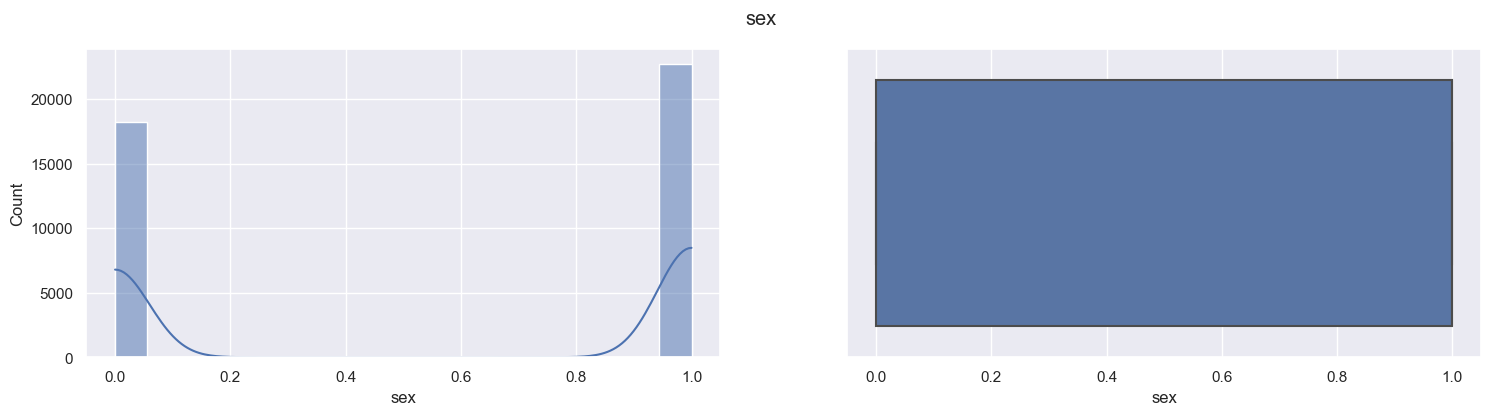

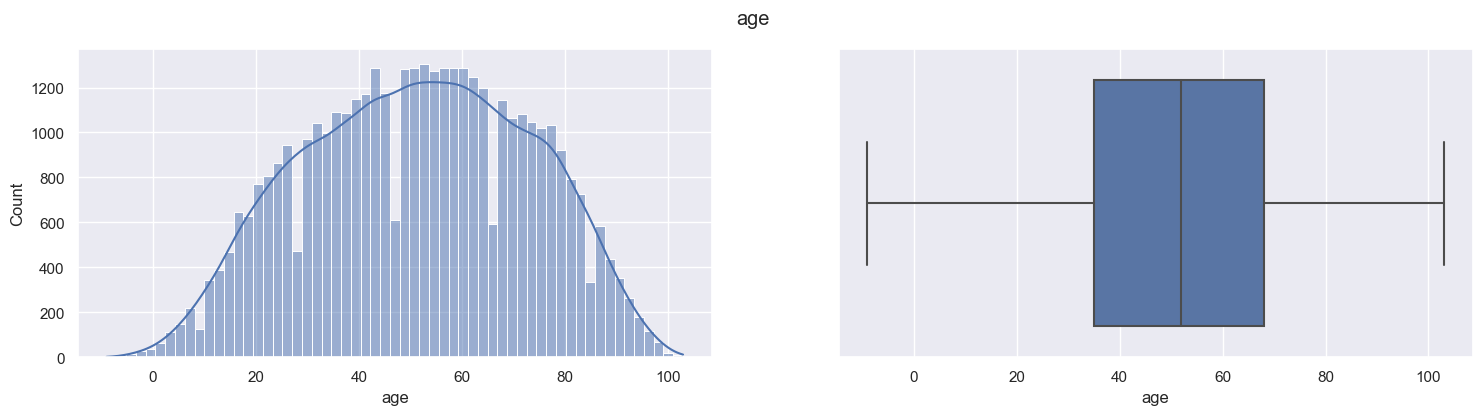

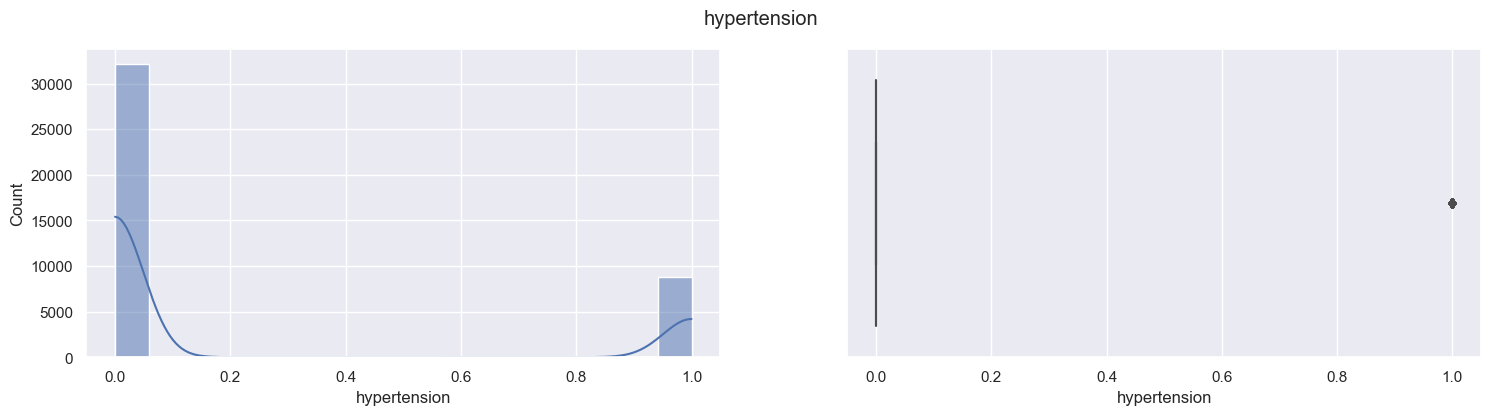

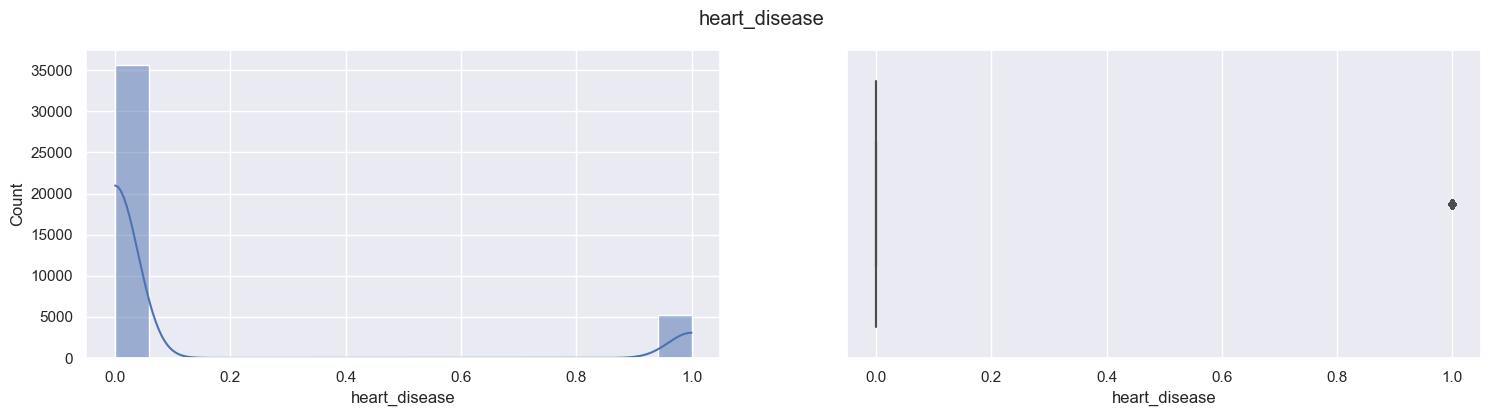

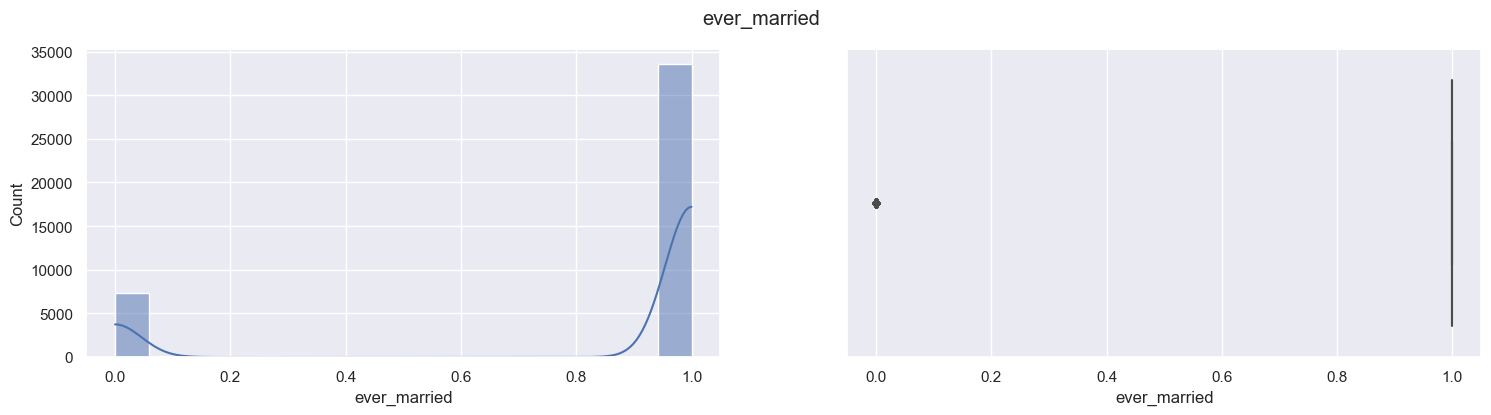

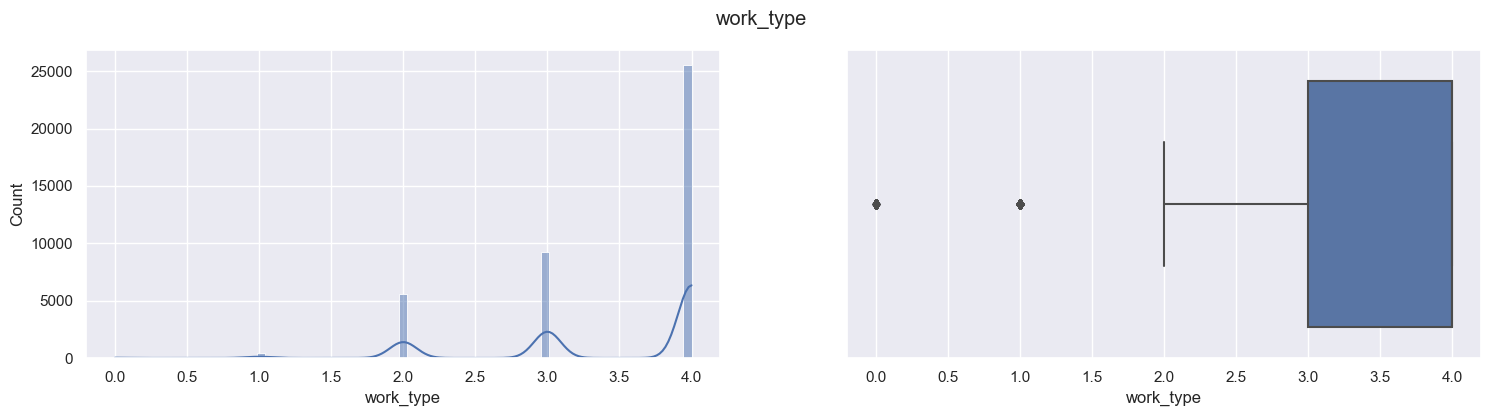

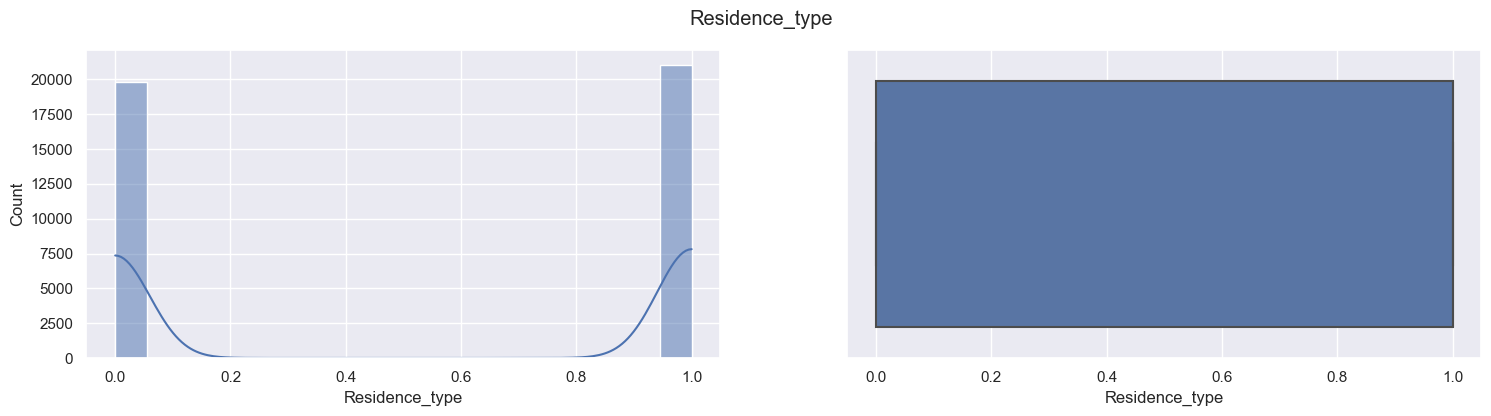

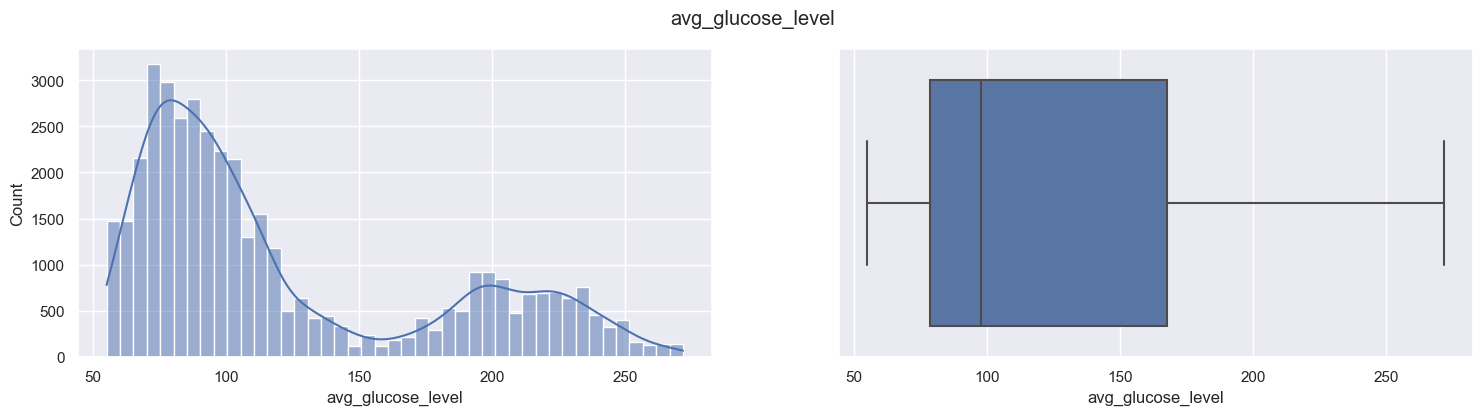

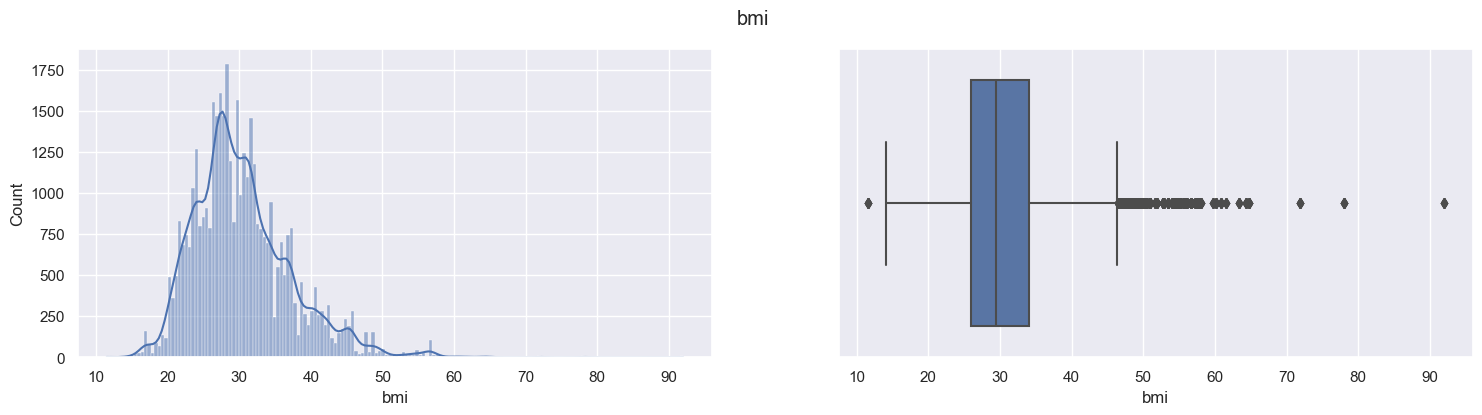

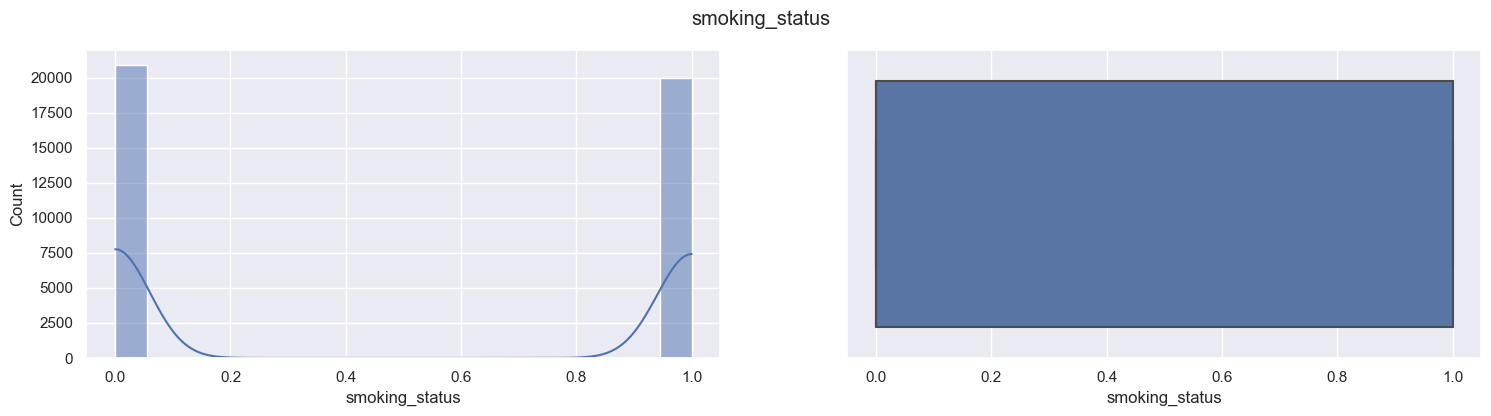

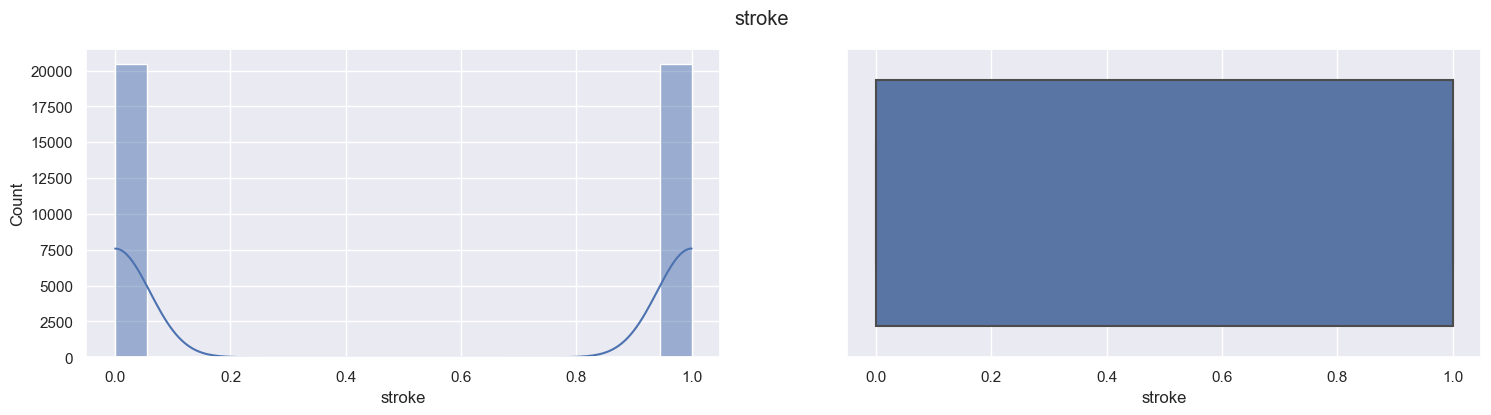

In [8]:
for column in data.columns.tolist():
    eda.plot_distribution(data, column, figures_path=FIGURES_PATH)
    

R: 'bmi' and 'avg_glucose_level' present a distribution close to the normal distribution. Standard scaler will be used for these features.

In [9]:
data_norm = data.copy()


In [10]:
features = ["bmi", "avg_glucose_level"]
for feature in features:
    data_norm[feature] = StandardScaler().fit_transform(data_norm[[feature]])


### Scaled dtributions

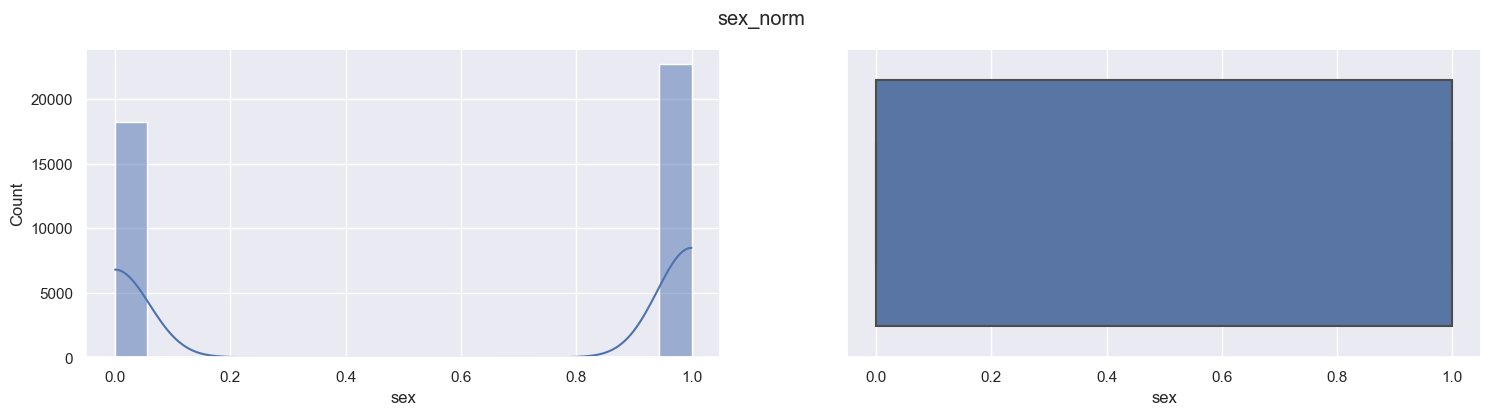

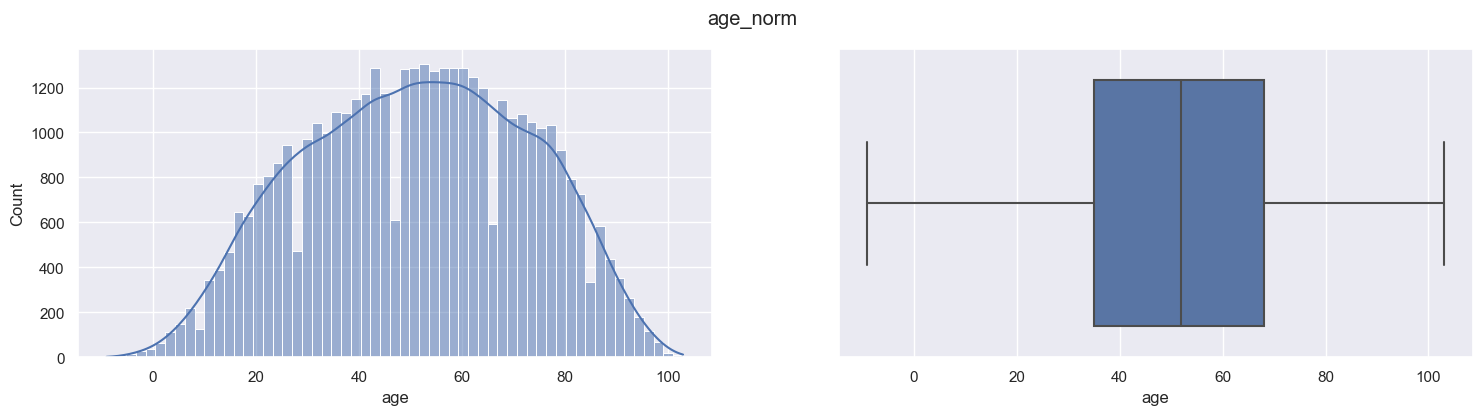

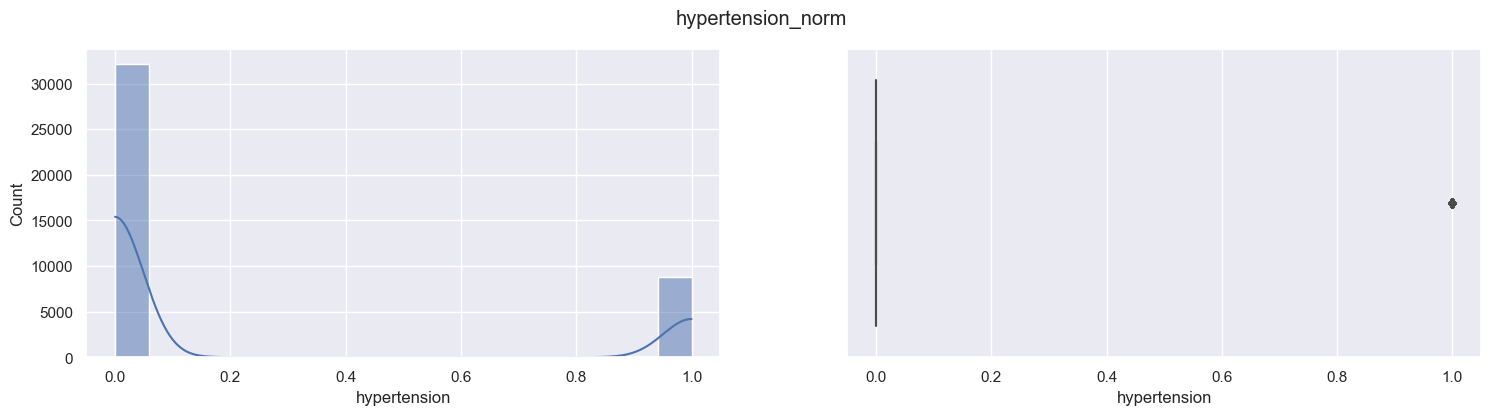

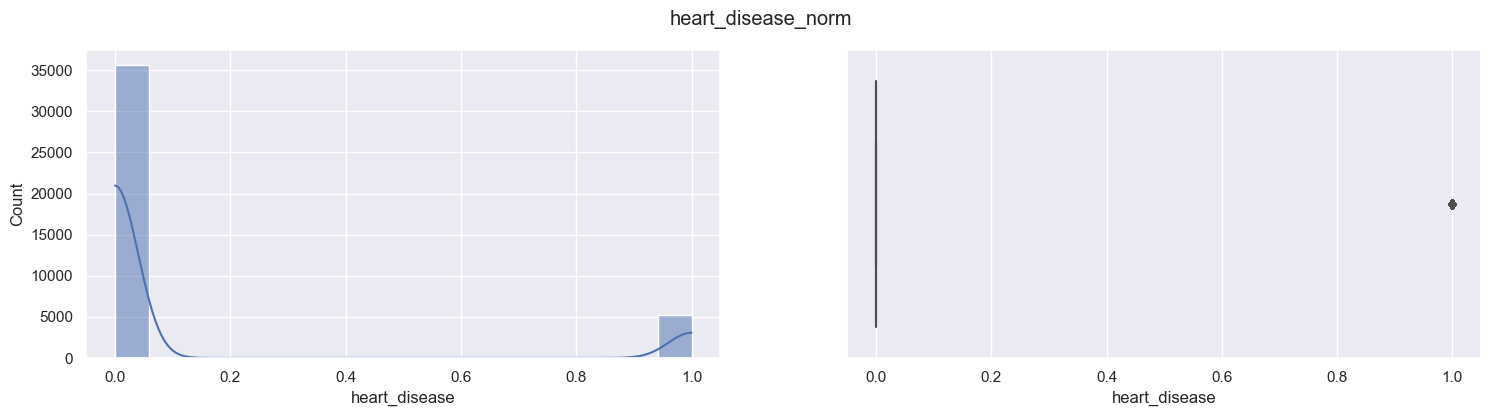

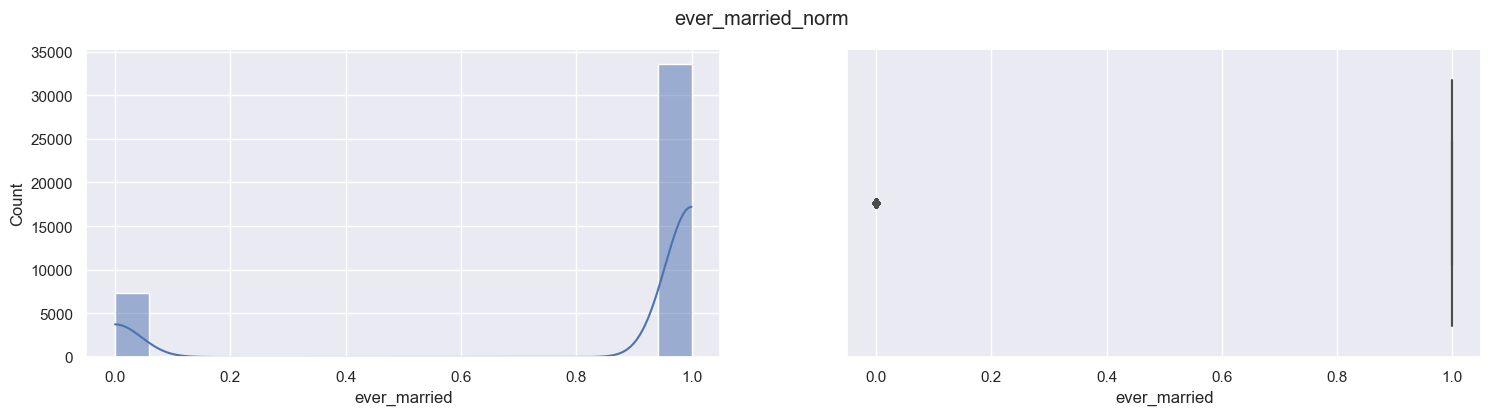

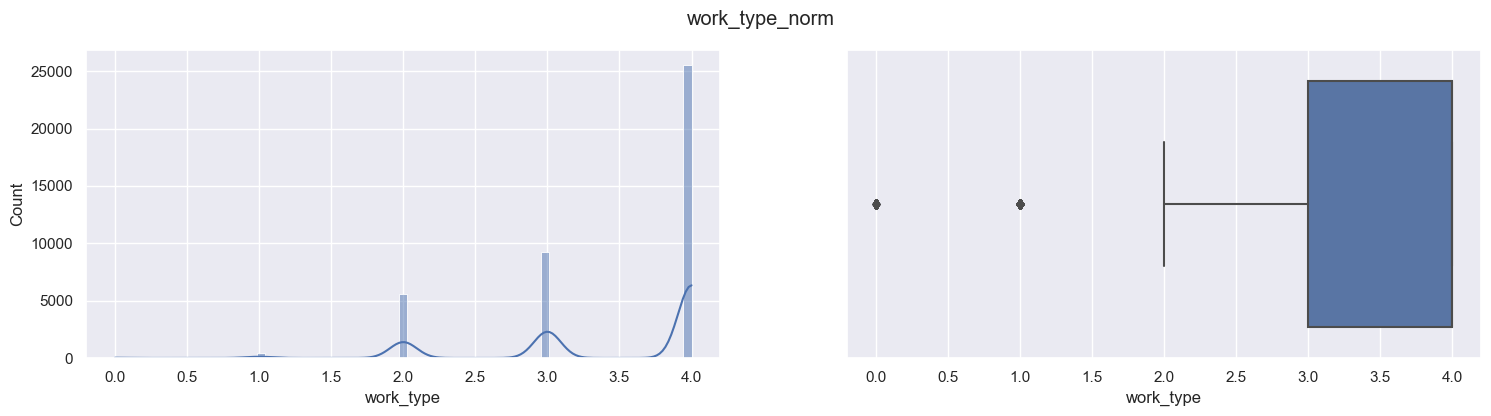

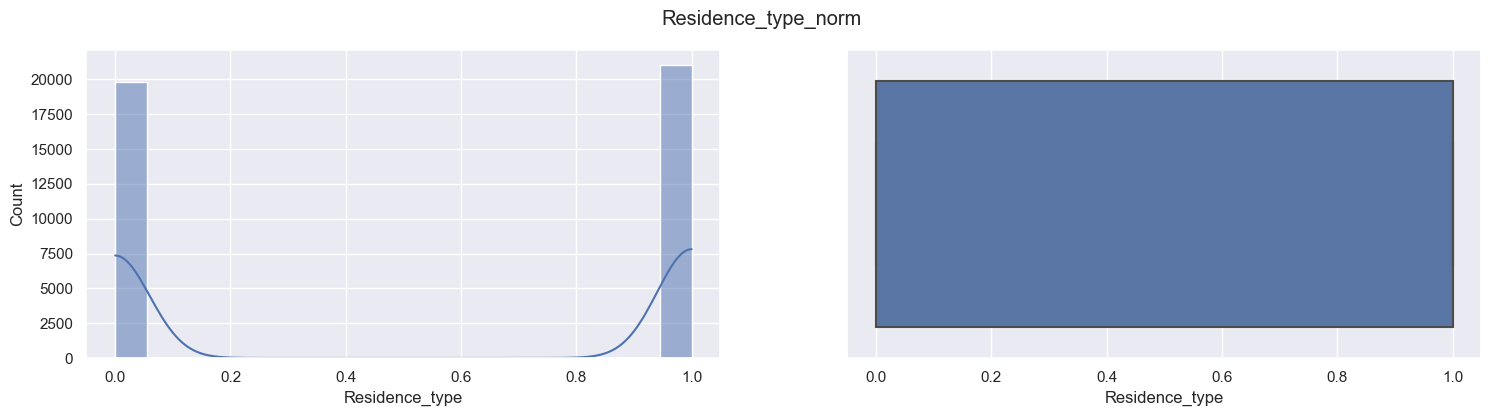

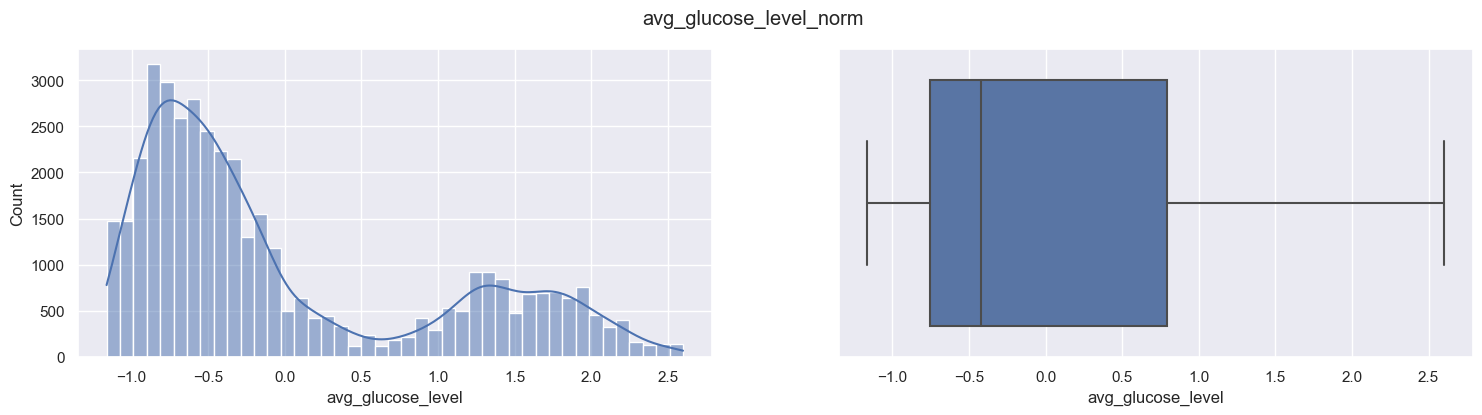

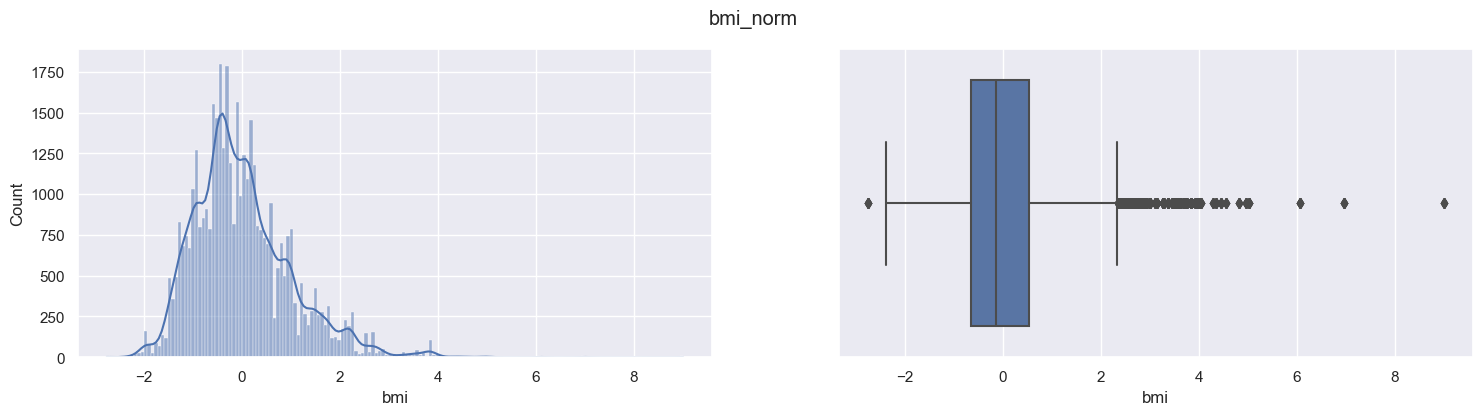

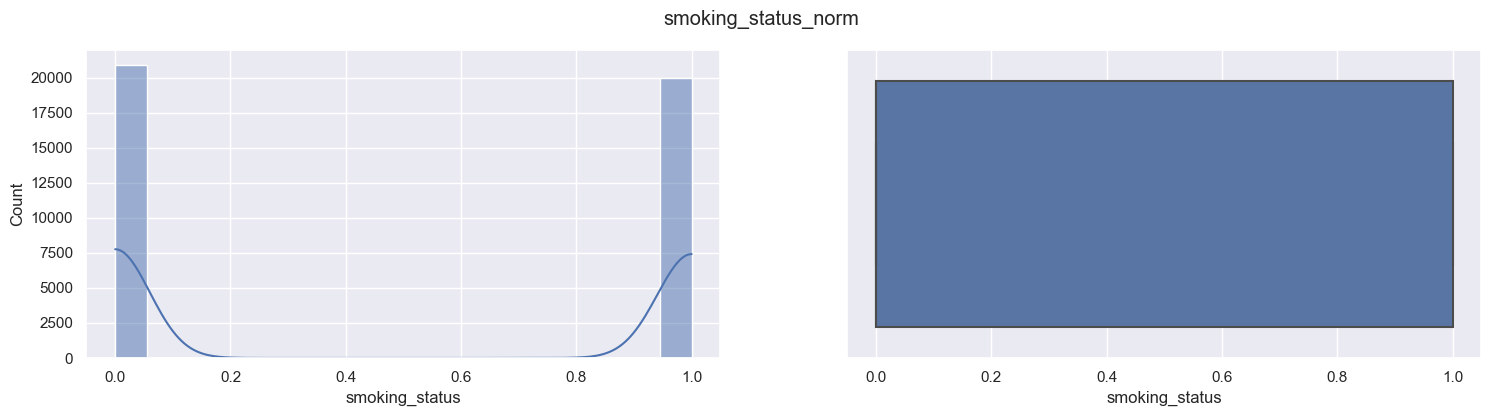

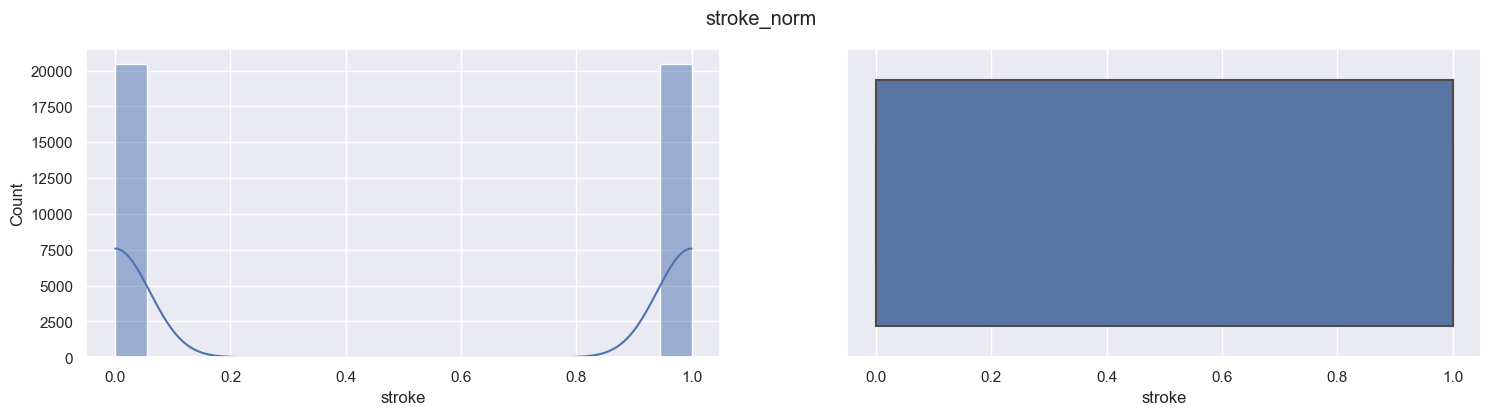

In [11]:
for column in data_norm.columns.tolist():
    eda.plot_distribution(data_norm, column, figures_path=FIGURES_PATH, sufix="norm")
    

## What do we know about the classes? Are theay balanced?

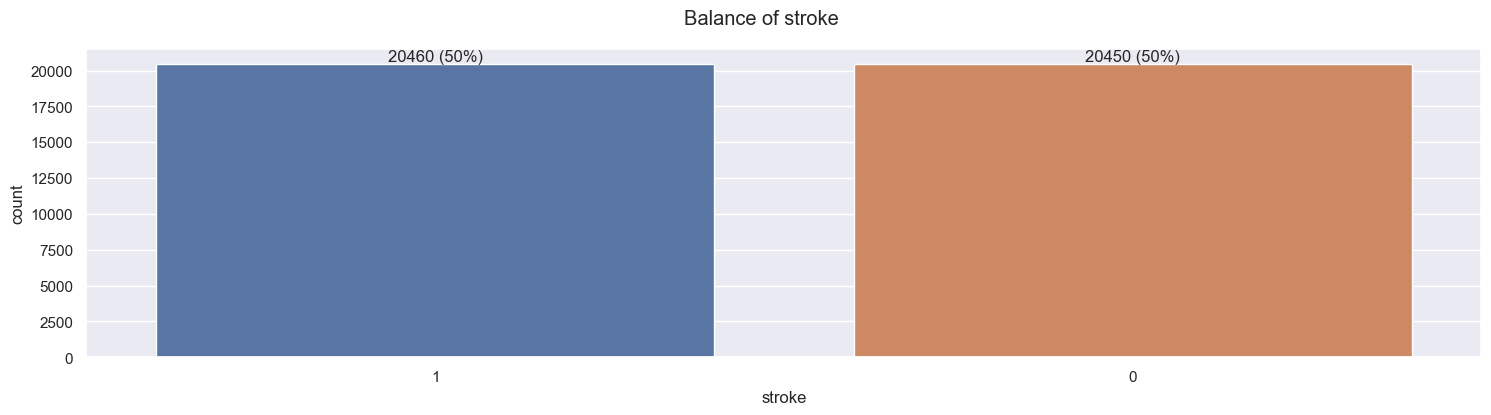

In [12]:
eda.plot_count(data, "stroke", figures_path=FIGURES_PATH)


R: The total number of instances per class varies by 10 instances, so it could be considered balanced.

# Feauture extraction

In [13]:
def build_3d_plot(data: pd.DataFrame, title: str = None):
    """Build 3D plot.

    :param pd.DataFrame data: Data to plot
    :param str title: Plot title
    """
    fig = plt.figure()
    fig.set_size_inches(10, 10)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)
    ax.set_xlabel(data.columns[0])
    ax.set_ylabel(data.columns[1])
    ax.set_zlabel(data.columns[2])
    ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], c=data.iloc[:, 3], cmap='viridis', linewidth=0.5)
    plt.savefig(f"./figures/{title.lower().replace(' ', '_')}.png", bbox_inches='tight')
    plt.show()


In [14]:
def get_heatmap(data: pd.DataFrame):
    """Build dataset correlation heatmap.

    :param pd.DataFrame data: Data to analyze
    """
    fig, ax = plt.subplots(1)
    fig.suptitle(f"Dataset's heatmap")
    fig.set_size_inches(10, 10)
    sns.heatmap(data=data.corr(), annot=True, cmap='BrBG', vmin=-1, vmax=1, ax=ax)
    plt.savefig(f"./figures/dataset_heatmap.png", bbox_inches='tight')
    plt.show()


In [15]:
X = data_norm.drop(columns=["stroke"])
Y = data_norm["stroke"].to_numpy()


## Pearson correlation


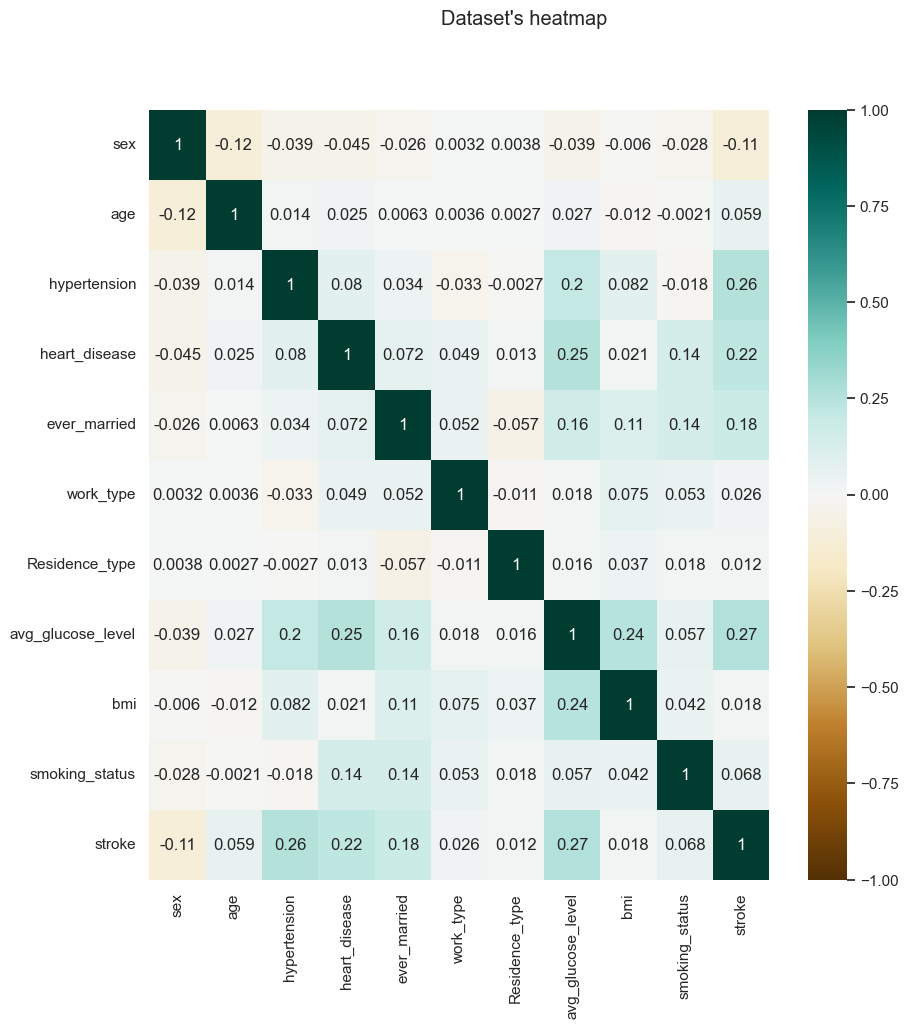

In [16]:
get_heatmap(data_norm)


In [17]:
X_pearson = X[["avg_glucose_level", "hypertension", "heart_disease"]]
X_pearson.head(10)


avg_glucose_level  hypertension  heart_disease
0           1.852199             0              1
1          -0.280675             0              1
2           0.853951             0              0
3           0.904158             1              0
4           1.114197             0              0
5          -0.903147             1              1
6          -0.480985             0              0
7          -0.723511             1              0
8          -0.028073             0              1
9          -0.305171             0              0

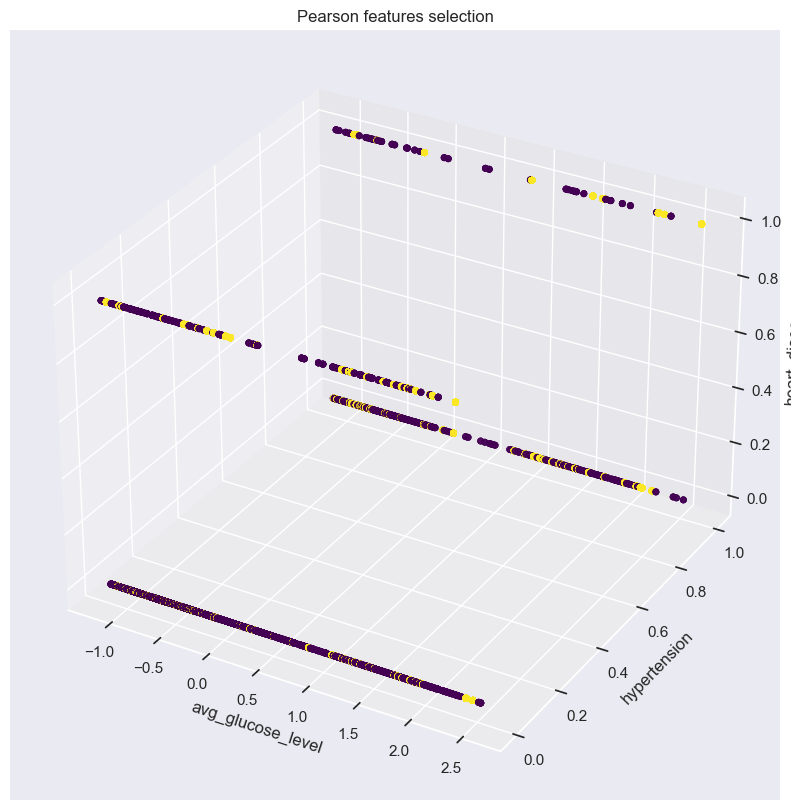

In [18]:
build_3d_plot(data_norm[["avg_glucose_level", "hypertension", "heart_disease", "stroke"]], title="Pearson features selection")


## PCA

In [19]:
X_pca = dimensionality_reduction.pca(X, 3, normalize_data=False)
X_pca.head(10)


PC1       PC2       PC3
0 -62.999917  2.382383  0.123122
1 -41.997645  0.419042  1.139954
2 -61.001119  1.414392  0.640770
3 -40.999618  0.329146 -0.709866
4 -84.999138  1.019205 -0.032313
5 -54.997497 -0.469861  1.007059
6 -82.000239 -0.823490  0.433768
7 -16.999978 -0.129432  1.122337
8 -30.997345  0.919447  1.005744
9 -55.000274 -0.119434  0.710086

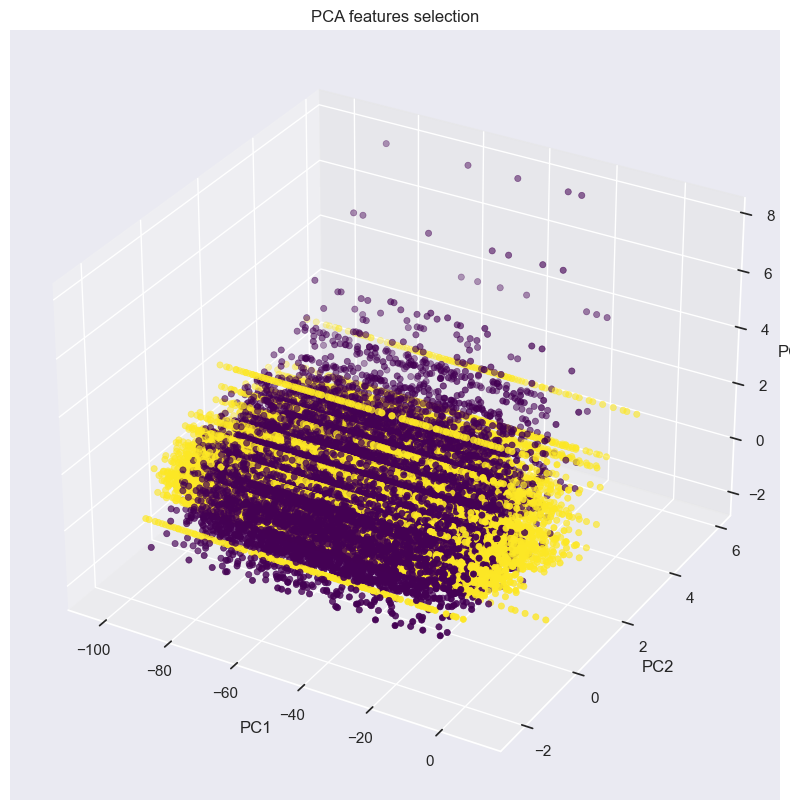

In [20]:
X_pca["stroke"] = Y
build_3d_plot(X_pca, title="PCA features selection")
X_pca = X_pca.drop(columns=["stroke"])


## Manual selection

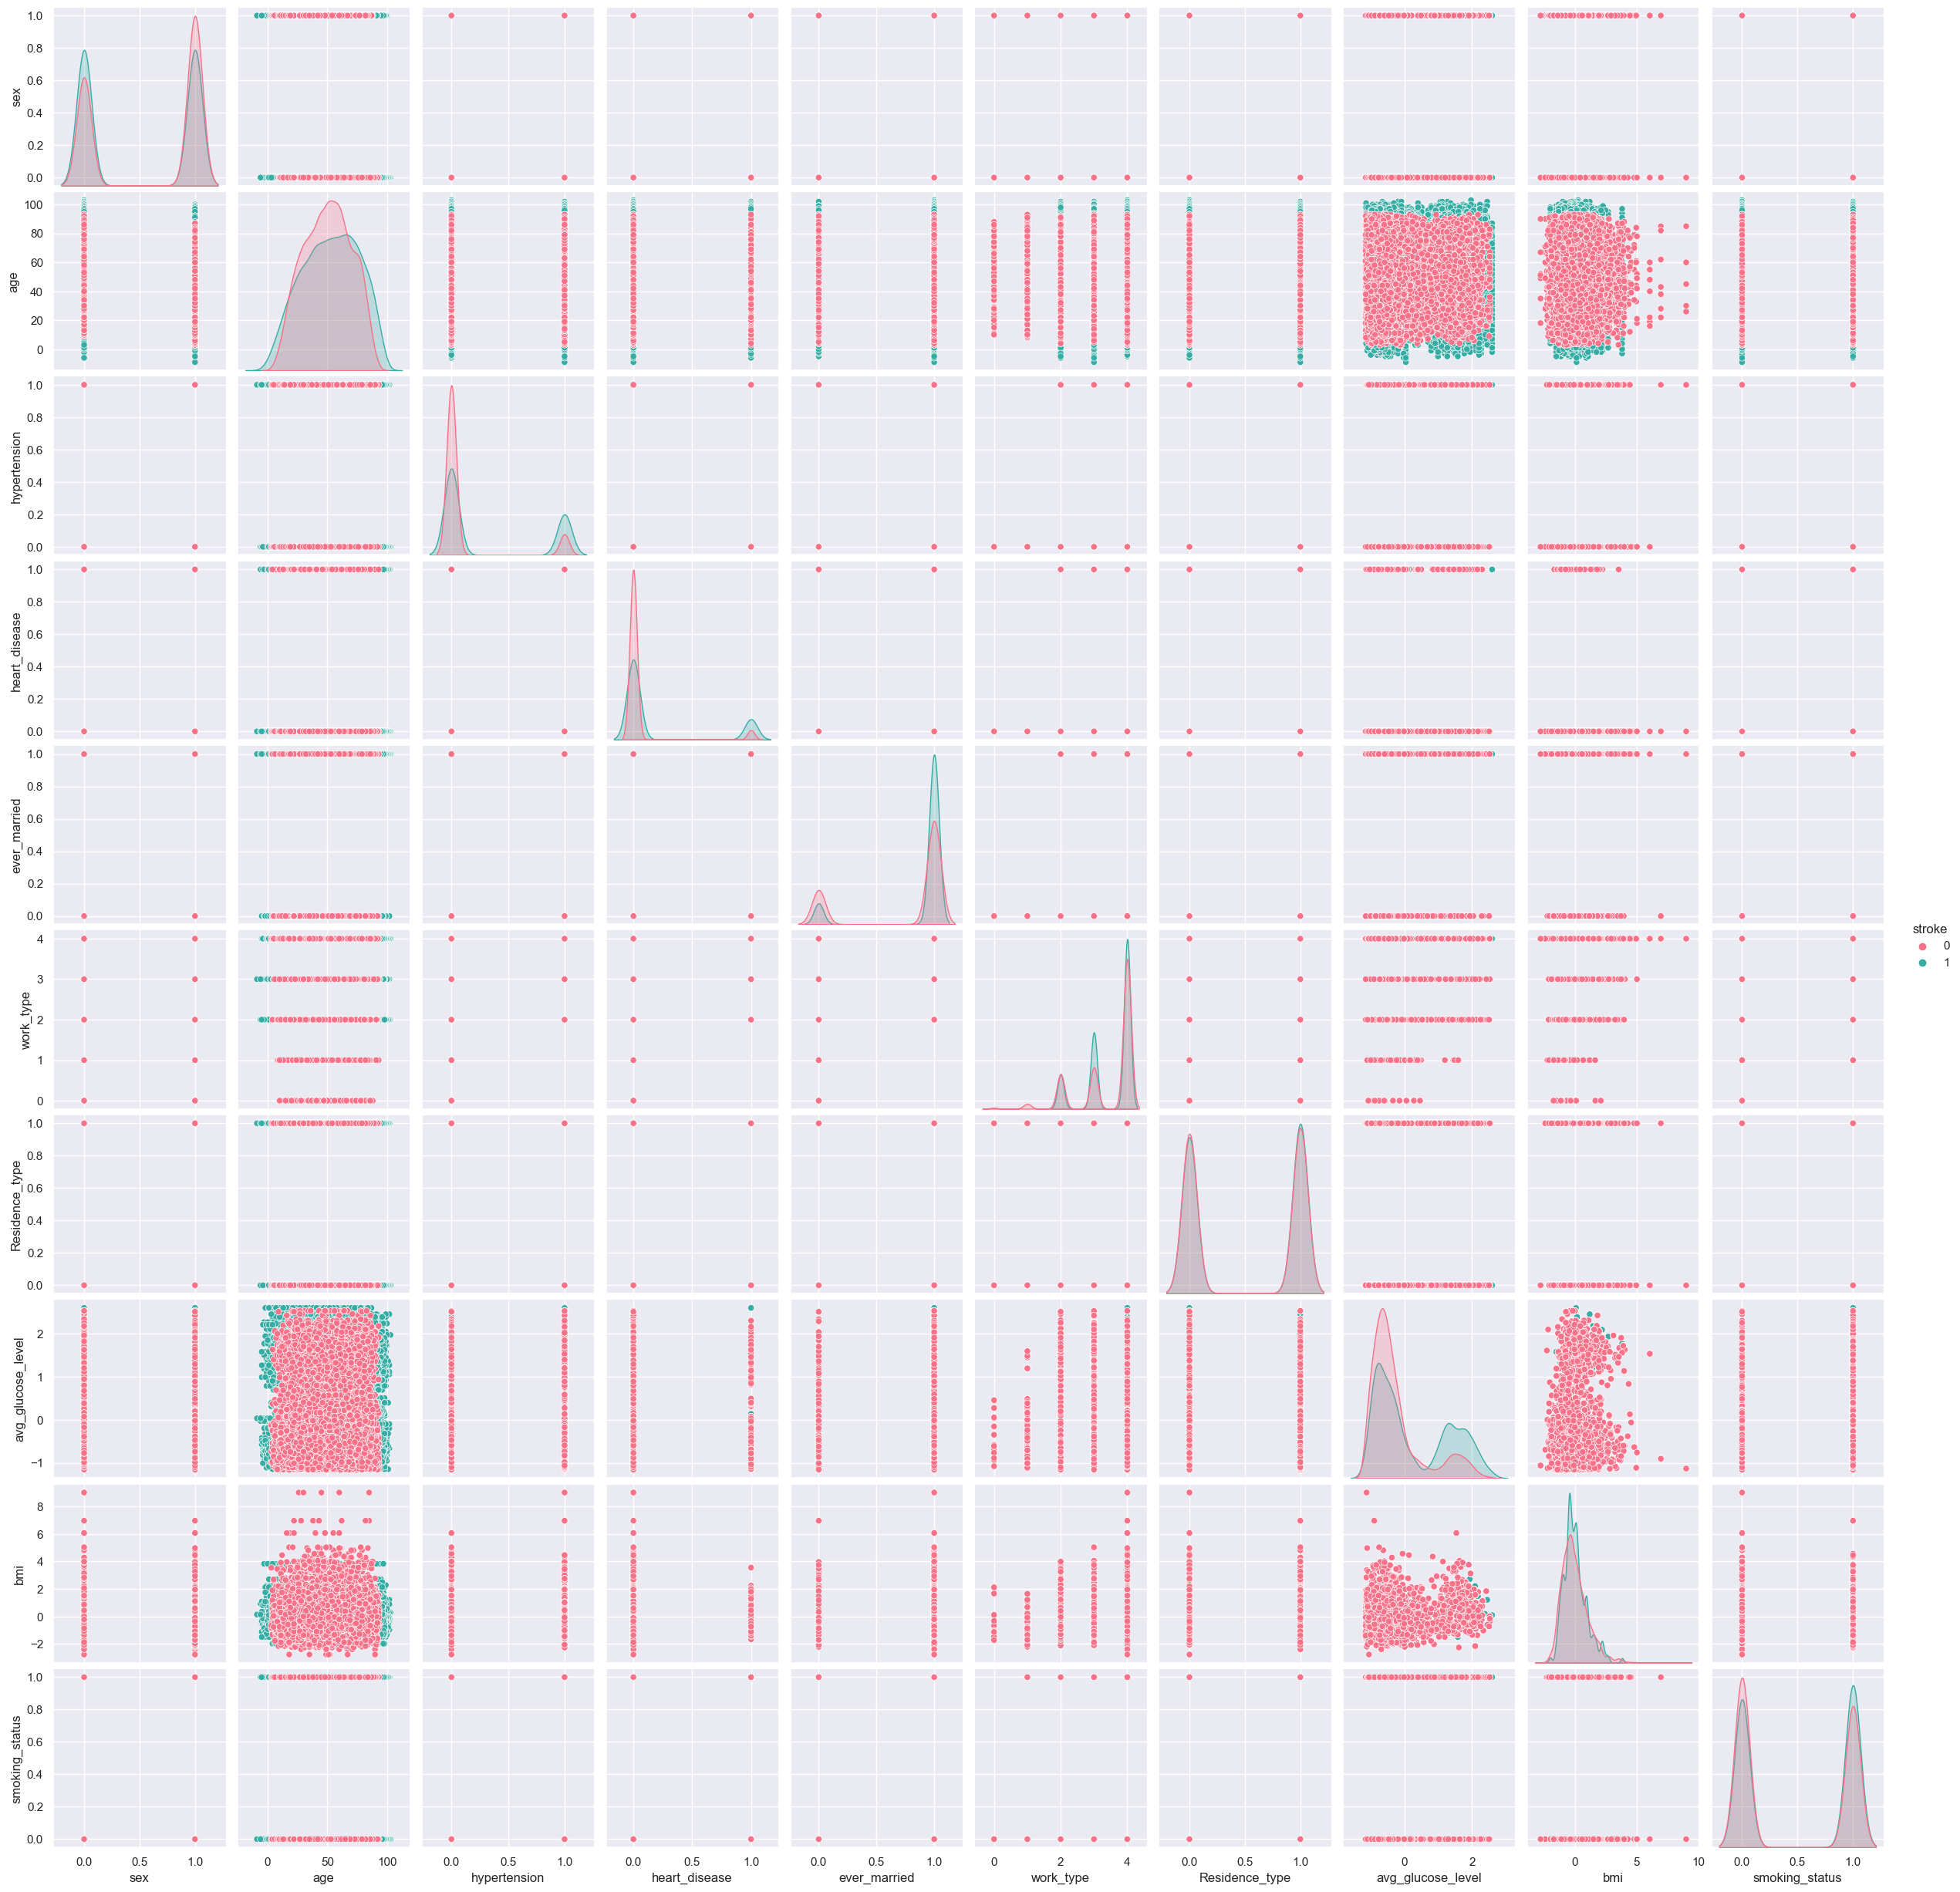

In [21]:
sns.pairplot(data_norm, hue="stroke", palette="husl")
plt.savefig(f"./figures/dataset_pairplot.png", bbox_inches='tight')
plt.show()


In [22]:
X_manual = X[['age', 'avg_glucose_level', 'bmi']]
X_manual.head(10)


age  avg_glucose_level       bmi
0   63           1.852199  0.906167
1   42          -0.280675  0.306313
2   61           0.853951  0.584294
3   41           0.904158 -0.937288
4   85           1.114197 -0.205758
5   55          -0.903147 -0.439848
6   82          -0.480985 -1.112856
7   17          -0.723511 -0.103344
8   31          -0.028073  0.935429
9   55          -0.305171 -0.454478

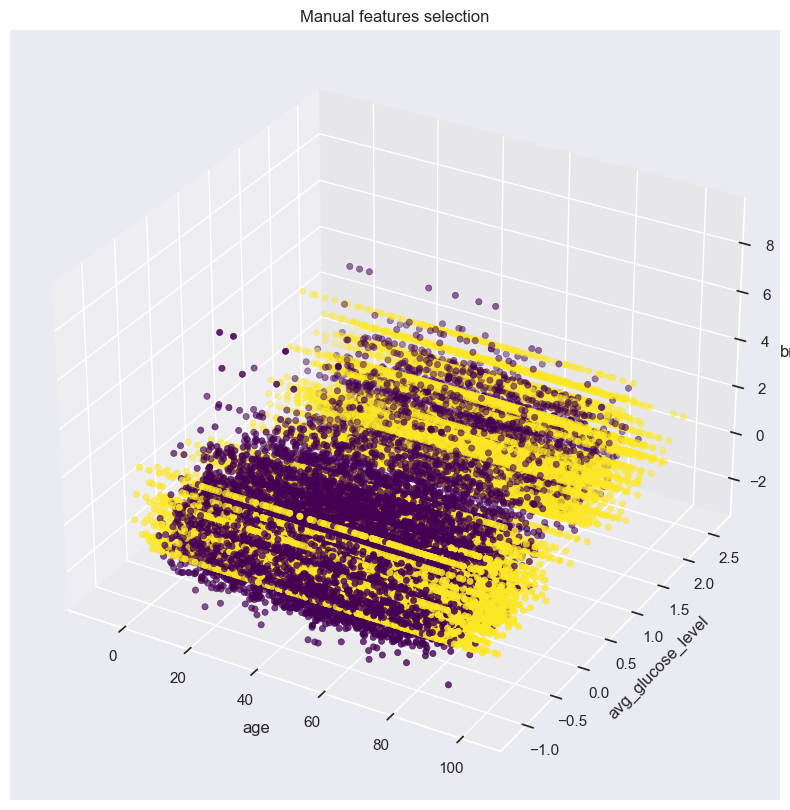

In [23]:
build_3d_plot(data_norm[["age", "avg_glucose_level", "bmi", "stroke"]], title="Manual features selection")


# K Nearest Neighbours

In [24]:
X_pearson = X_pearson.to_numpy()
X_pearson_train, X_pearson_test, Y_pearson_train, Y_pearson_test = train_test_split(X_pearson, Y, test_size=0.30, random_state=445)

X_pca = X_pca.to_numpy()
X_pca_train, X_pca_test, Y_pca_train, Y_pca_test = train_test_split(X_pca, Y, test_size=0.30, random_state=445)

X_manual = X_manual.to_numpy()
X_manual_train, X_manual_test, Y_manual_train, Y_manual_test = train_test_split(X_manual, Y, test_size=0.30, random_state=445)


## Implementation

In [25]:
class KNNClassifier:
    """KNN Classifier algorithm implementation without using sklearn."""

    def __init__(self, k: int = 3, distance_metric: str = "euclidean"):
        """KNNClassifier class constructor.

        :param int k: Number of neighbors to consider
        :param str distance_metric: Distance metric to use
        """
        self.k = k
        self.distance_metric = distance_metric
        self.X_train = None
        self.Y_train = None

    def fit(self, X_train: np.ndarray, Y_train: np.ndarray):
        """Fit classifier.

        :param np.ndarray X_train: Training data
        :param np.ndarray Y_train: Training labels
        """
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        """Predict labels for test data.

        :param np.ndarray X_test: Test data
        :return: Predicted labels
        :rtype: np.ndarray
        """
        predictions = []
        for x_test in X_test:
            distances = []
            for x_train in self.X_train:
                if self.distance_metric == "euclidean":
                    distance = np.linalg.norm(x_train - x_test)
                elif self.distance_metric == "manhattan":
                    distance = np.sum(np.abs(x_train - x_test))
                distances.append(distance)
            distances = np.array(distances)
            sorted_indexes = distances.argsort()[:self.k]
            sorted_labels = self.Y_train[sorted_indexes]
            predictions.append(np.bincount(sorted_labels).argmax())
        return np.array(predictions)


## Evaluation

In [26]:
def evaluate_classifier(predictions: np.ndarray, actual: np.ndarray, title: str):
    """Evaluate classifier predictions.

    :param np.ndarray predictions: Predictions
    :param np.ndarray actual: Actual labels
    :param str title: Plot title
    """
    cm = confusion_matrix(actual, predictions)
    cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues')
    plt.title(title)
    plt.savefig(f"./figures/{title.lower().replace(' ', '_')}.png", bbox_inches='tight')
    plt.show()
    print(f"Accuracy:\t{accuracy_score(actual, predictions):.4f}")
    print(f"Recall:\t\t{recall_score(actual, predictions):.4f}")
    print(f"Precision:\t{precision_score(actual, predictions):.4f}")
    print(f"F1:\t\t{f1_score(actual, predictions):.4f}")


In [27]:
def display_predictions(X: np.ndarray, predictions: np.ndarray, actual: np.ndarray, title: str):
    """Display classifier predictions.

    :param np.ndarray predictions: Predictions
    :param np.ndarray actual: Actual labels
    :param str title: Plot title
    """
    fig = plt.figure()
    fig.set_size_inches(10, 10)
    ax = fig.add_subplot(111, projection='3d')
    colors_actual = ['r' if label == 0 else 'b' for label in actual]
    colors_predictions = ['r' if label == 0 else 'b' for label in predictions]

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors_actual, marker="o", label="Etiquetas reales")
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors_predictions, marker="x", label="Etiquetas predichas")
    ax.set_title(title)
    ax.legend()
    plt.savefig(f"./figures/{title.lower().replace(' ', '_')}.png", bbox_inches='tight')
    plt.show()


### Pearson features test

In [28]:
pearson_knn = KNNClassifier(k=3)
pearson_knn.fit(X_pearson_train, Y_pearson_train)
pearson_predictions = pearson_knn.predict(X_pearson_test)


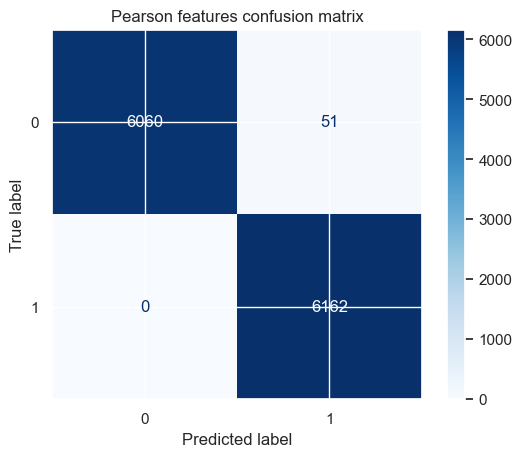

Accuracy:	0.9958
Recall:		1.0000
Precision:	0.9918
F1:		0.9959


In [29]:
evaluate_classifier(pearson_predictions, Y_pearson_test, title="Pearson features confusion matrix")


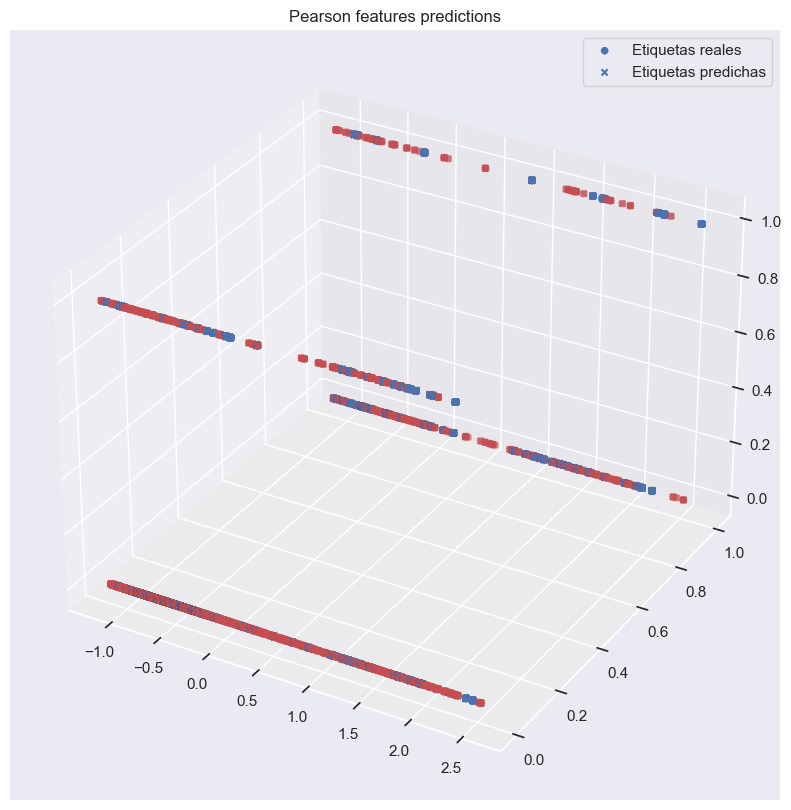

In [30]:
display_predictions(X_pearson_test, pearson_predictions, Y_pearson_test, title="Pearson features predictions")


### PCA features test

In [31]:
pca_knn = KNNClassifier(k=3)
pca_knn.fit(X_pca_train, Y_pca_train)
pca_predictions = pca_knn.predict(X_pca_test)


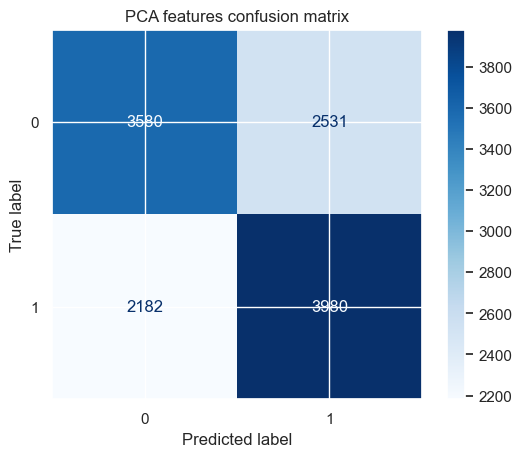

Accuracy:	0.6160
Recall:		0.6459
Precision:	0.6113
F1:		0.6281


In [32]:
evaluate_classifier(pca_predictions, Y_pca_test, title="PCA features confusion matrix")


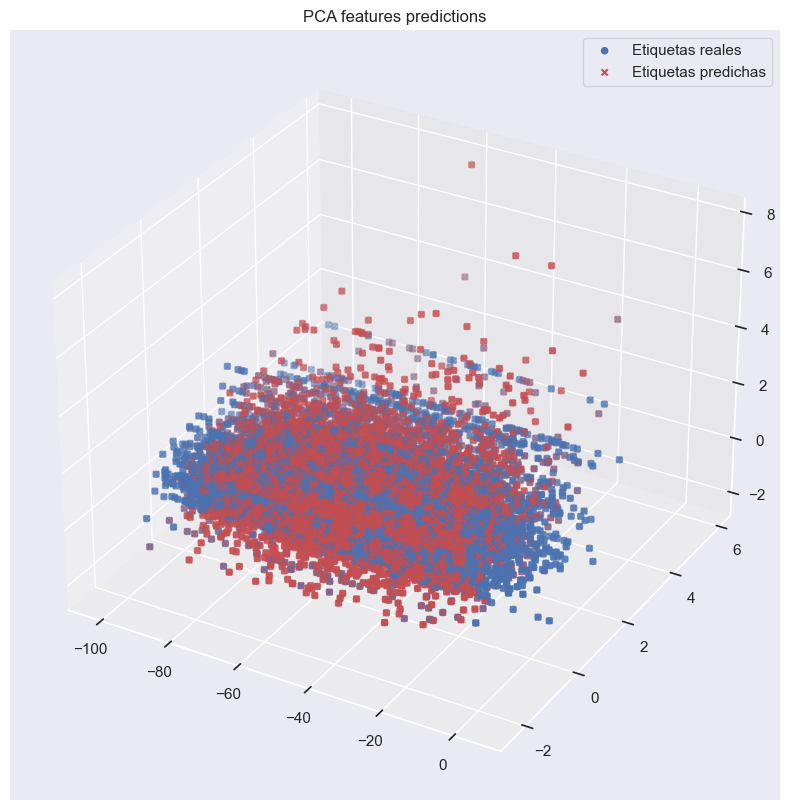

In [33]:
display_predictions(X_pca_test, pca_predictions, Y_pca_test, title="PCA features predictions")


### Manual features test

In [34]:
manual_knn = KNNClassifier(k=3)
manual_knn.fit(X_manual_train, Y_manual_train)
manual_predictions = manual_knn.predict(X_manual_test)


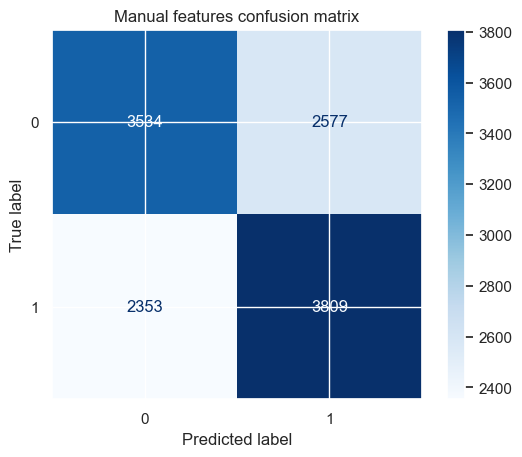

Accuracy:	0.5983
Recall:		0.6181
Precision:	0.5965
F1:		0.6071


In [35]:
evaluate_classifier(manual_predictions, Y_manual_test, title="Manual features confusion matrix")


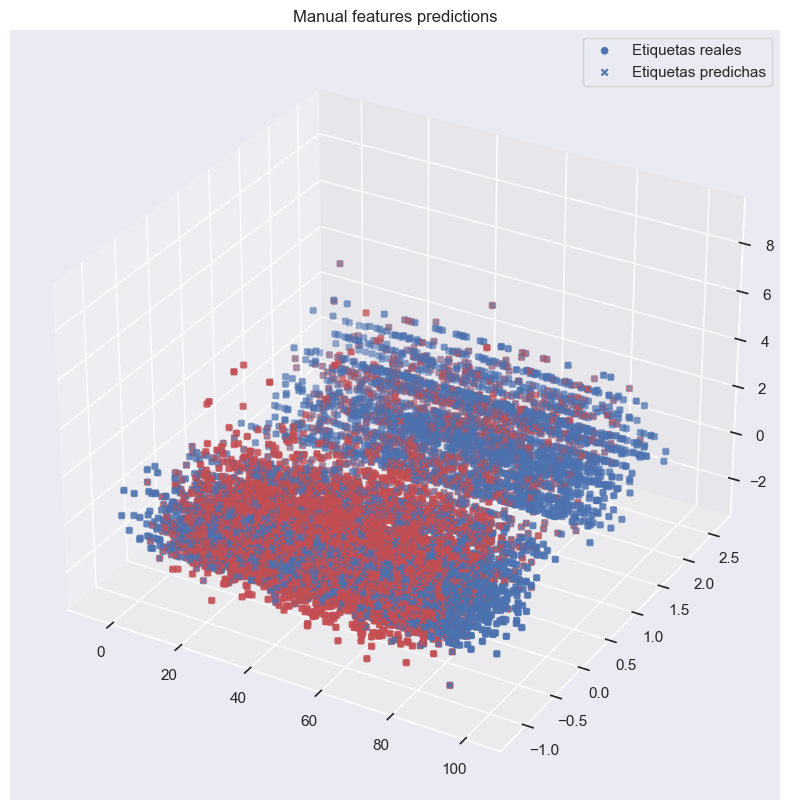

In [36]:
display_predictions(X_manual_test, manual_predictions, Y_manual_test, title="Manual features predictions")
